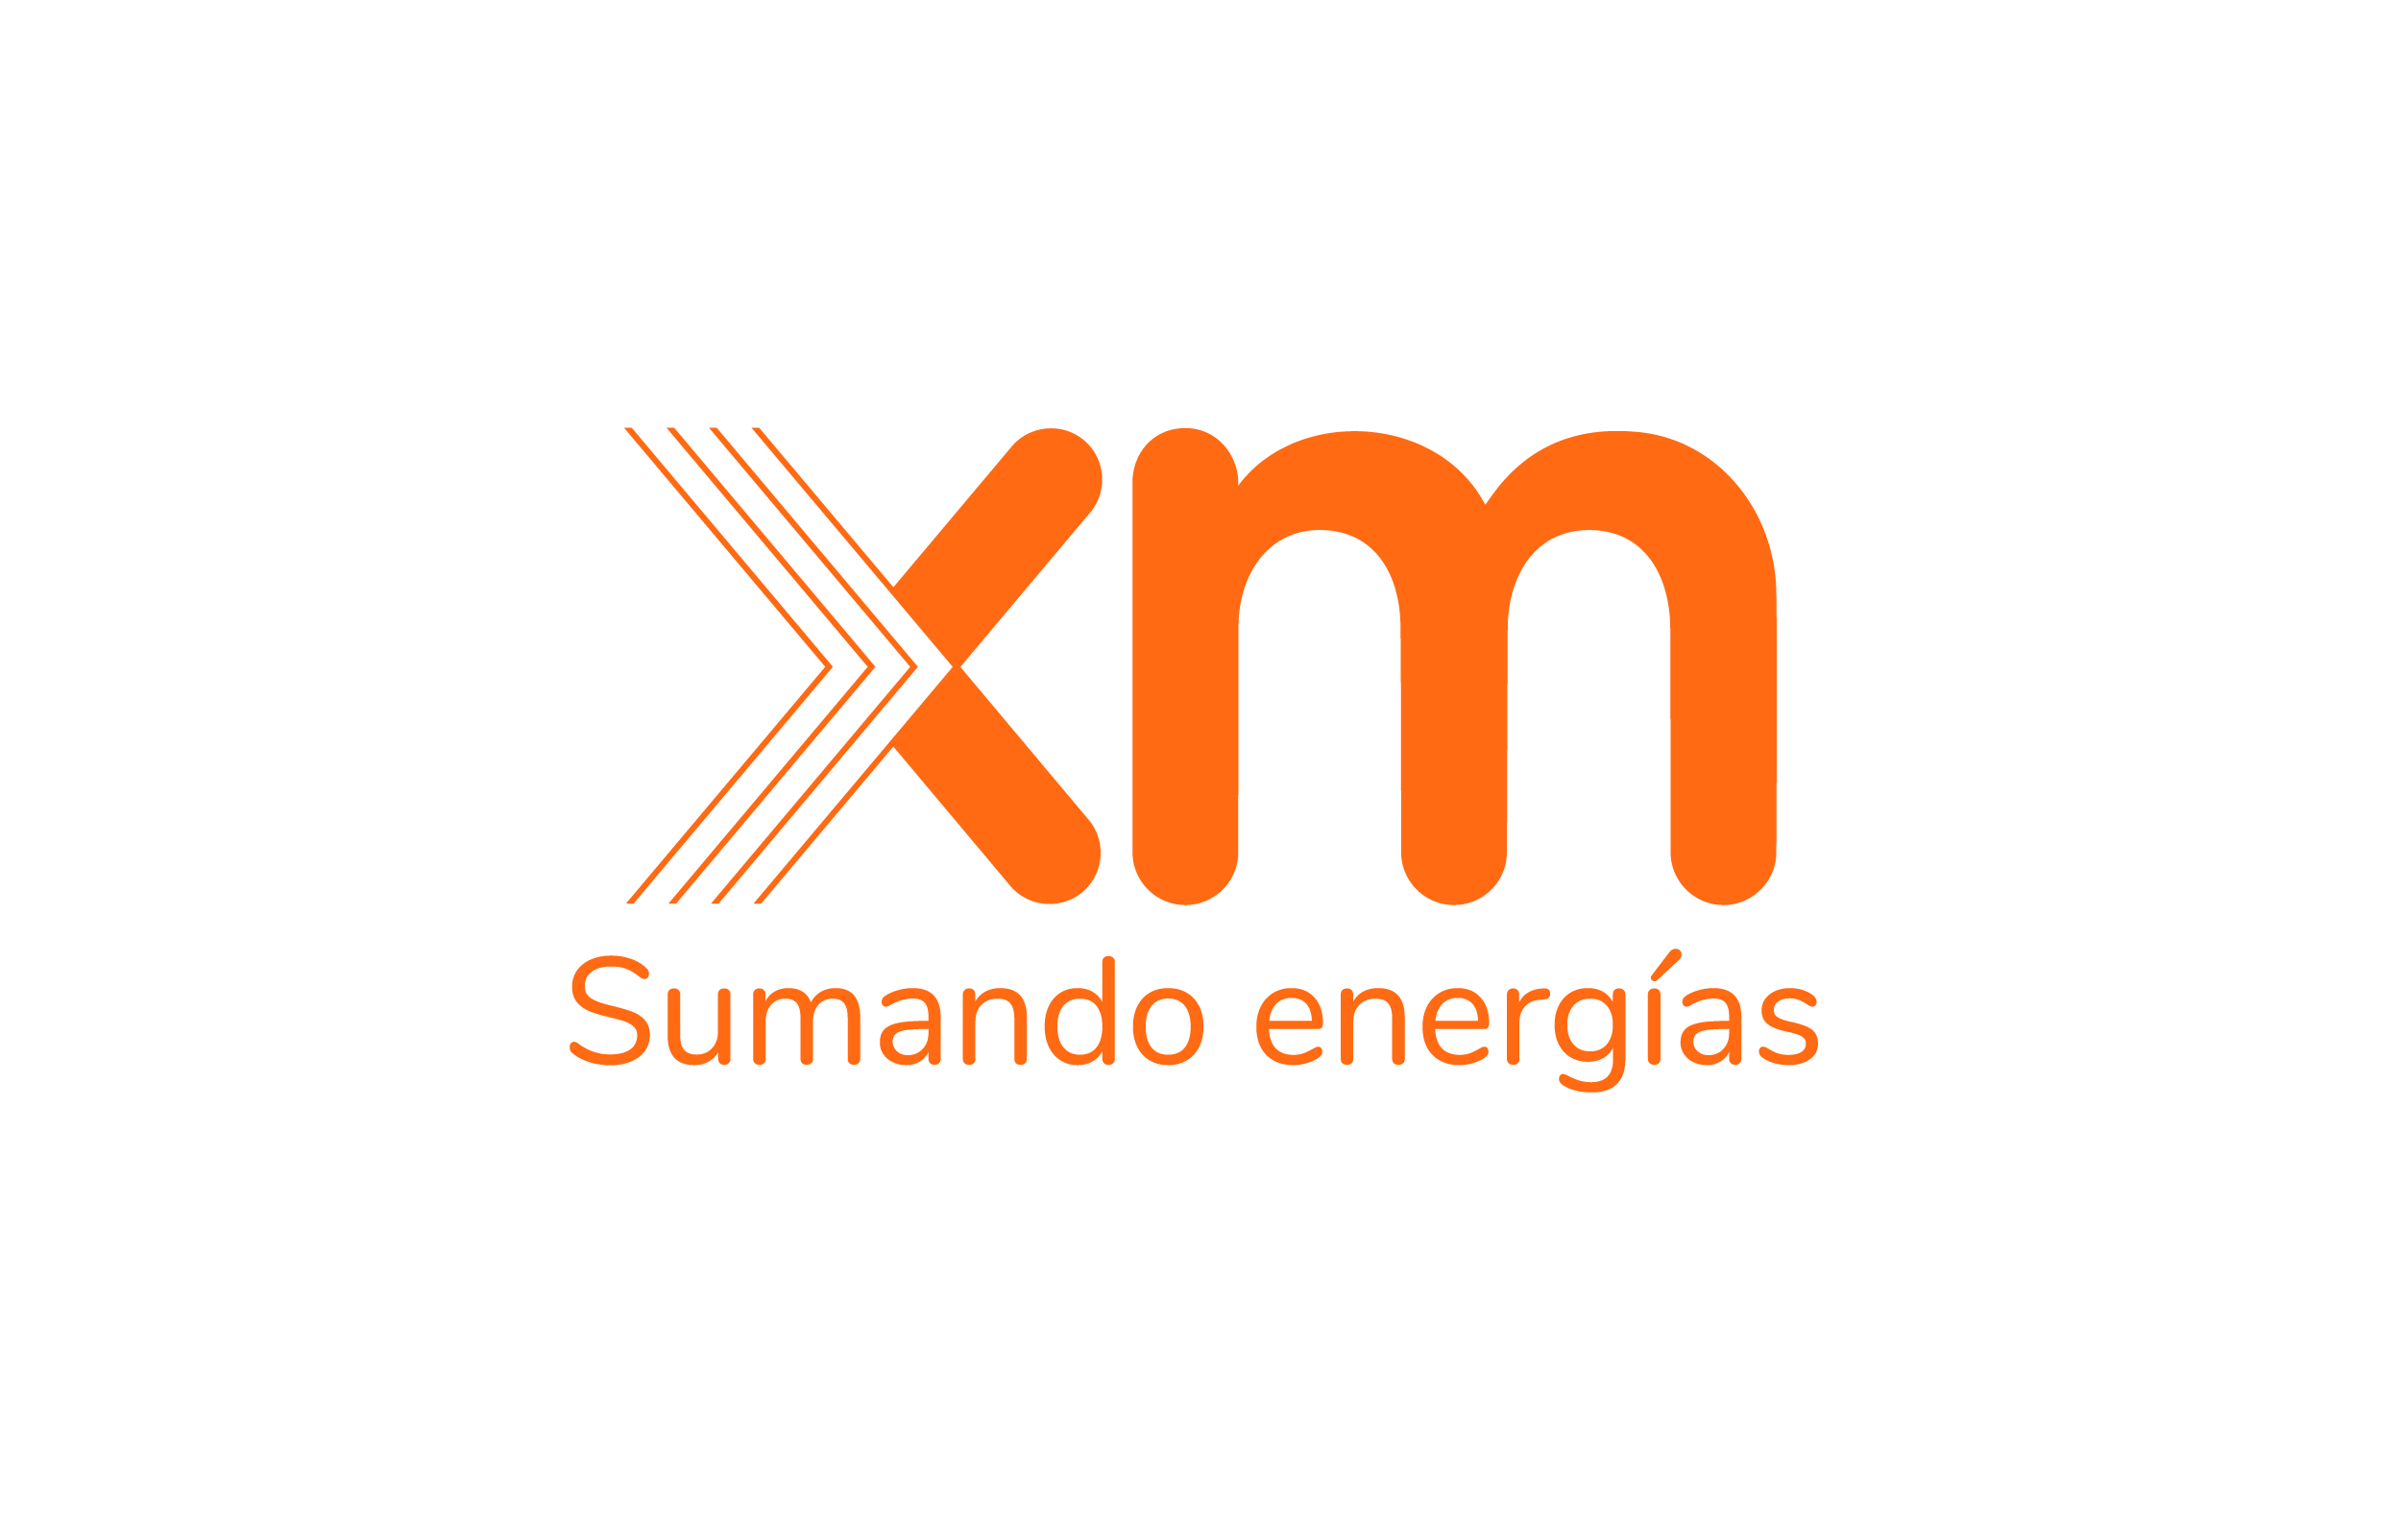

## Ejemplo de Consulta con la API pydataxm

El primer paso es garantizar que en el ambiente que se ejecturá los comandos de python, se cuenta con la librería de **pydataxm**. Por favor ejecutar el siguiente comando:

In [2]:
!pip install pydataxm

La versión de la librería pydataxm utilizada en el presente ejemplo corresponde a 0.3.0

Para más ejemplos, por favor remitirse a: https://github.com/EquipoAnaliticaXM/API_XM/tree/master/examples

In [3]:
from pydataxm import *                          
import datetime as dt  
import pandas as pd

En el presente ejemplo se propende exhibir una forma de obtener los datos relacionados a la Genereación Real por Recurso, obteniendo finalmente los que son de tipo hidráulico durante las fechas *2022-05-05 y 2022-05-06*.

In [4]:
objetoAPI = pydataxm.ReadDB()  # Se asigna un objeto que pueda realizar el consumo de la data en la API

Para tener algo más de información, acerca de nuestra consulta y sus conexos; hacemos una exploración en los parámetros de la misma, a través del método *get_collections*. A saber, **Gene** es la abreviación como parámetro de **Generación Real**.

In [5]:
df = objetoAPI.get_collections("Gene") # El método get_collection con argumentos retorna los cruces de las varibles que se quieren consultar
df.head()

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
4,Gene,Generación,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Generacion neta de cada una de las plantas Nac...
9,Gene,Generación,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generacion neta de cada una de las plantas Nac...


El proceso de consulta se realiza mediante la conjunción de dos consultas. Una de ellas nos devuelve la *Generación Real por código de recurso*; y una segunda, en que obtenemos el listado de recursos con los atributos, donde se identifica código de recurso y tipo de generación.
 
Luego, se unen estas dos (2) consultas (o tablas para nuestra caso); en donde veremos de forma explícita los valores que se tiene en la generación horaria por kWh, y su respectivo código. Todo esto, para el caso de la generación hidráulica. Exploremos:

In [6]:
df_generacion = objetoAPI.request_data(
                                    'Gene',
                                    'Recurso',
                                    dt.date(2022,5,5),
                                    dt.date(2022,5,6)) 
df_generacion.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Recurso,2QBW,12799.20,13788.66,14200.22,19836.30,18097.71,14777.79,19742.81,19902.50,...,19929.74,19916.74,19914.36,19913.71,19873.14,19789.67,19875.04,19908.17,19901.78,2022-05-05
1,Recurso,2QRL,667.14,666.24,666.12,666.03,666.48,523.11,648.24,643.11,...,649.29,649.38,649.05,655.05,667.89,665.82,668.16,667.35,666.60,2022-05-05
2,Recurso,2QV2,10735.20,10738.80,10738.80,10735.20,10738.80,10738.80,10735.20,9136.55,...,NaN,4168.17,10760.40,10764.00,10764.00,10764.00,10756.80,10753.20,10753.20,2022-05-05
3,Recurso,2R22,12124.68,12119.12,12120.89,12122.10,12117.92,12119.39,12120.16,12123.49,...,12122.85,12122.31,12129.72,12131.70,17716.32,17775.31,17652.88,12037.97,12031.42,2022-05-05
4,Recurso,2S6Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-05


En la siguiente consulta, obtendremos los tipo de generación para cada código.

In [7]:
df_sistema = objetoAPI.request_data(
                                'ListadoRecursos',
                                'Sistema', 
                                dt.date(2022, 5, 5), 
                                dt.date(2022, 5, 6))
df_sistema.head()

,Id,Values_Code,Values_Name,Values_Type,Values_Disp,Values_RecType,Values_CompanyCode,Values_EnerSource,Values_OperStartdate,Values_State,Date
0,Sistema,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,FILO DE AGUA,ISGG,AGUA,2014-03-31,OPERACION,2022-05-18
1,Sistema,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25,OPERACION,2022-05-18
2,Sistema,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,HZEG,AGUA,2014-07-24,OPERACION,2022-05-18
3,Sistema,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30,OPERACION,2022-05-18
4,Sistema,2R22,LAGUNETA,HIDRAULICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17,OPERACION,2022-05-18


Dado que hay muchas variables que no se utilzarán para lograr el objetivo, seleccionaremos las relevantes. De esta forma no cargaremos información ociosa.

In [8]:
df_sistema = df_sistema[['Values_Code', 'Values_Name', 'Values_Type']]
df_sistema.head()

,Values_Code,Values_Name,Values_Type
0,2QBW,EL POPAL,HIDRAULICA
1,2QEK,SALTO II,HIDRAULICA
2,2QRL,LA REBUSCA,HIDRAULICA
3,2QV2,BAJO TULUA,HIDRAULICA
4,2R22,LAGUNETA,HIDRAULICA


Ahora que se tienen las dos consultas mencionadas, se procede a unirlas. El resultado será un dataframe que contiene la información solicitada.

In [9]:
df = pd.merge(df_generacion,df_sistema,left_on=['Values_code'],right_on=['Values_Code'],how='left')
df.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date,Values_Code,Values_Name,Values_Type
0,Recurso,2QBW,12799.20,13788.66,14200.22,19836.30,18097.71,14777.79,19742.81,19902.50,...,19913.71,19873.14,19789.67,19875.04,19908.17,19901.78,2022-05-05,2QBW,EL POPAL,HIDRAULICA
1,Recurso,2QRL,667.14,666.24,666.12,666.03,666.48,523.11,648.24,643.11,...,655.05,667.89,665.82,668.16,667.35,666.60,2022-05-05,2QRL,LA REBUSCA,HIDRAULICA
2,Recurso,2QV2,10735.20,10738.80,10738.80,10735.20,10738.80,10738.80,10735.20,9136.55,...,10764.00,10764.00,10764.00,10756.80,10753.20,10753.20,2022-05-05,2QV2,BAJO TULUA,HIDRAULICA
3,Recurso,2R22,12124.68,12119.12,12120.89,12122.10,12117.92,12119.39,12120.16,12123.49,...,12131.70,17716.32,17775.31,17652.88,12037.97,12031.42,2022-05-05,2R22,LAGUNETA,HIDRAULICA
4,Recurso,2S6Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-05,2S6Q,AUTOG YAGUARITO,TERMICA


Por último, procedemos con filtrar el tipo de generación. Para este caso específico, será hidráulica.

In [10]:
df_hidraulica = df.query('Values_Type == "HIDRAULICA"')
df_hidraulica

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date,Values_Code,Values_Name,Values_Type
0,Recurso,2QBW,12799.20,13788.66,14200.22,19836.30,18097.71,14777.79,19742.81,19902.50,...,19913.71,19873.14,19789.67,19875.04,19908.17,19901.78,2022-05-05,2QBW,EL POPAL,HIDRAULICA
1,Recurso,2QRL,667.14,666.24,666.12,666.03,666.48,523.11,648.24,643.11,...,655.05,667.89,665.82,668.16,667.35,666.60,2022-05-05,2QRL,LA REBUSCA,HIDRAULICA
2,Recurso,2QV2,10735.20,10738.80,10738.80,10735.20,10738.80,10738.80,10735.20,9136.55,...,10764.00,10764.00,10764.00,10756.80,10753.20,10753.20,2022-05-05,2QV2,BAJO TULUA,HIDRAULICA
3,Recurso,2R22,12124.68,12119.12,12120.89,12122.10,12117.92,12119.39,12120.16,12123.49,...,12131.70,17716.32,17775.31,17652.88,12037.97,12031.42,2022-05-05,2R22,LAGUNETA,HIDRAULICA
6,Recurso,2S6U,5698.44,2383.59,6101.54,6123.15,6097.08,6106.98,6107.31,6096.09,...,6006.50,6006.66,6053.85,6094.44,6100.55,6103.19,2022-05-05,2S6U,AUTOG ARGOS EL CAIRO,HIDRAULICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Recurso,TUJ1,19753.96,19762.06,19770.75,19774.27,19758.76,19761.68,19776.08,16143.02,...,19782.61,19747.78,19624.09,19683.02,19780.01,19751.99,2022-05-06,TUJ1,TUNJITA,HIDRAULICA
362,Recurso,UNN1,699.84,704.40,706.56,708.84,708.12,707.28,711.24,711.00,...,779.40,775.56,774.24,776.28,592.68,776.28,2022-05-06,UNN1,UNION,HIDRAULICA
363,Recurso,URA1,247599.93,247687.85,247781.59,247821.32,247699.97,247634.11,247802.19,247822.12,...,248125.46,247997.79,248077.42,248156.97,248233.52,248160.86,2022-05-06,URA1,URRA,HIDRAULICA
364,Recurso,VLT1,732.60,NaN,NaN,NaN,NaN,NaN,9189.40,10461.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-06,VLT1,LA VUELTA,HIDRAULICA
